In [1]:
import numpy as np
import matplotlib.pyplot as plt
import oct2py
from oct2py import octave

In [2]:
%load_ext oct2py.ipython

For how to use octave magic, see https://nbviewer.jupyter.org/github/blink1073/oct2py/blob/master/example/octavemagic_extension.ipynb

In [3]:
octave.addpath("../..")

'.:/opt/conda/lib/python3.8/site-packages/oct2py:/opt/conda/lib/python3.8/site-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/5.2.0/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v53/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/5.2.0/site/m:/usr/share/octave/site/api-v53/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/5.2.0/oct/x86_64-pc-linux-gnu:/usr/share/octave/5.2.0/m:/usr/share/octave/5.2.0/m/audio:/usr/share/octave/5.2.0/m/debian:/usr/share/octave/5.2.0/m/deprecated:/usr/share/octave/5.2.0/m/elfun:/usr/share/octave/5.2.0/m/general:/usr/share/octave/5.2.0/m/geometry:/usr/share/octave/5.2.0/m/gui:/usr/share/octave/5.2.0/m/help:/usr/share/octave/5.2.0/m/image:/usr/share/octave/5.2.0/m/io:/usr/share/octave/5.2.0/m/java:/usr/share/octave/5.2.0/m/legacy:/usr/share/octave/5.2.0/m/linear-algebra:/usr/share/octave/5.2.0/m/miscellaneous:/usr/share/octave

We can call octave function directly using `octave.func_name()`

In [4]:
octave.grid2dirs(10, 10)

array([[0.        , 0.        ],
       [0.        , 0.17453293],
       [0.17453293, 0.17453293],
       ...,
       [5.93411946, 2.96705973],
       [6.10865238, 2.96705973],
       [0.        , 3.14159265]])

Octave script can be evaluated using octave cell magic, with arguments `-i in0,in1,...` and `-o out0,out1,...`.

In [5]:
%%octave -o F
aziElev2aziIncl = @(dirs) [dirs(:,1) pi/2-dirs(:,2)];

Nord = 4;
fcosAlpha = @(azi, polar, azi0, polar0) cos(polar)*cos(polar0) + ...
    sin(polar)*sin(polar0).*cos(azi-azi0);  % function for dipole oriented at azi0, polar0
polar0 = pi/4;
azi0 = pi/4;
fcardioid = @(azi, polar) (1/2).^Nord * (1+fcosAlpha(azi, polar, azi0, polar0)).^Nord;

dirs = grid2dirs(10, 10);
F = fcardioid(dirs(:,1), dirs(:,2));

oct2py can capture plotted figure using `-f png` or `-f svg`.

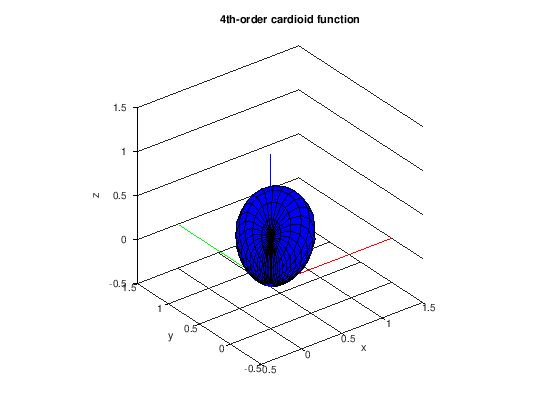

In [6]:
%%octave -f png
% plot function using the spherical plotting function
figure
plotSphFunctionGrid(Fdirs2grid(F,10,10,1), 10,10,'real',gca);
axis([-0.5 1.5 -0.5 1.5 -0.5 1.5]), view(3), title('4th-order cardioid function')